In [1]:
import sys
import torch
import torchvision.transforms as T
from IPython.display import Audio
import librosa
from src.Dataset import AudioMNIST
import custom_transforms as CT
from scipy import signal
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
from scipy.signal import stft, istft

In [2]:
sample_rate=22050
n_fft=512
root = '../Data'


In [3]:
# For waveform output
dataset_wave = AudioMNIST(
    root='../Data',
    target_sample_rate=22050,
    transform=T.Compose([
        CT.TrimSilence(5),
        CT.FixLength(22050//4)
    ]),
    output_format='waveform'
)

# For spectrogram output (complex)
dataset_spec = AudioMNIST(
    root='../Data',
    target_sample_rate=22050,
    transform=T.Compose([
        CT.TrimSilence(5),
        CT.FixLength(22050//4)
    ]),
    output_format='spectrogram',
    spec_params={
        'n_fft': 512,
        'n_freq': 128,
        'n_time': 44,
        'complex_output': False
    }
)

# For magnitude spectrogram output
dataset_mag_spec = AudioMNIST(
    root='../Data',
    target_sample_rate=22050,
    transform=T.Compose([
        CT.TrimSilence(5),
        CT.FixLength(22050//4)
    ]),
    output_format='spectrogram',
    spec_params={
        'n_fft': 512,
        'n_freq': 128,
        'n_time': 44,
        'complex_output': False
    }
)

In [4]:
import numpy as np
Zxx = dataset_spec[30][0]
Zxx.shape

torch.Size([2, 128, 44])


torch.Size([2, 128, 44])

C:\Users\kaasa\AppData\Local\Temp\ipykernel_15284\1924799597.py:3: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  Zxxx = librosa.amplitude_to_db(Zxx_rec, ref = np.max)


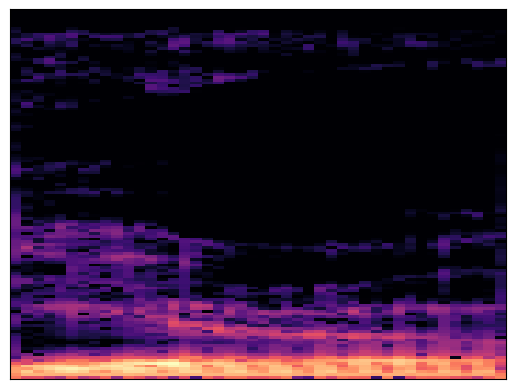

In [8]:
import matplotlib.pyplot as plt
Zxx_rec = dataset_spec.twod_to_complex(Zxx)
Zxxx = librosa.amplitude_to_db(Zxx_rec, ref = np.max)
librosa.display.specshow(Zxxx[0])


In [ ]:
import numpy as np
Zxxx = np.abs(Zxx)
Zxxx = np.atleast_3d(Zxxx).transpose(2,0,1)
        # convert to decibel
Zxxx = librosa.amplitude_to_db(Zxxx, ref = np.max)
import matplotlib.pyplot as plt
librosa.display.specshow(Zxxx[0])
plt.title("Real")

In [ ]:
from torchsummary import summary
from src.Classifier import LightningAudioClassifier

model = LightningAudioClassifier()


summary(model, (2, 128, 173),device='cpu')